Энергия связи атома Uran-238-92: 1793.473 МэВ
Масса атома Uran-238-92 : 223544.342 МэВ
Радиус ядра атома Uran-238-92: 8.676 Фм
Бета-распад атома Uran-238-92 возможен
Деление атома Uran-238-92 на 2 чётно чётных осколка возможно


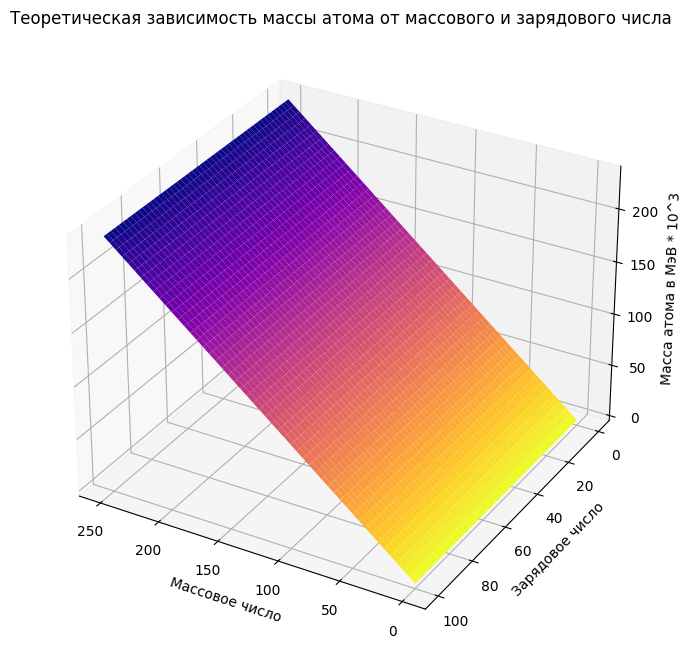

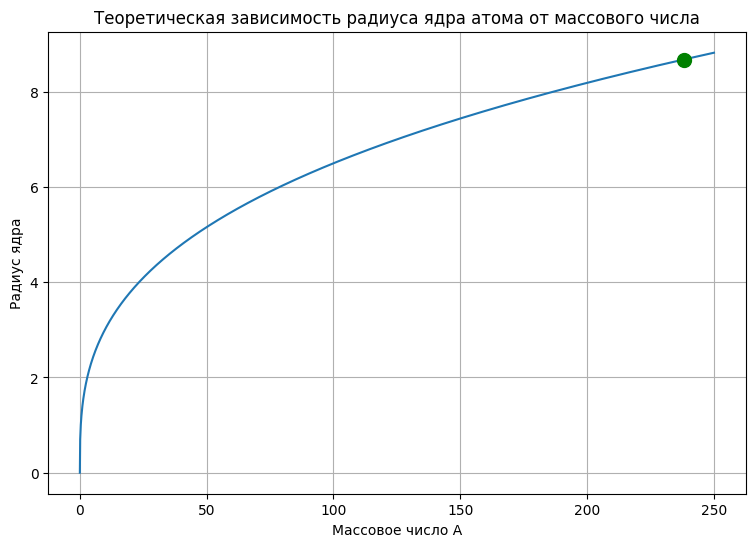

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class Nuclear():

    mass_n = 939.565
    mass_p = 938.27
    mass_e = 0.5109989
    R0 = 1.4
    a1 = 15.7
    a2 = 17.8
    a3 = 0.71
    a4 = 23.7
    a5 = 34

    def __init__(self, name, A, Z):
        self.name = name
        self.A = A
        self.Z = Z

    def G_nuclear(self):
        print(f'Энергия связи атома {self.name}-{self.A}-{self.Z}: {Nuclear.a1*self.A - Nuclear.a2*np.power(self.A, 2/3) - Nuclear.a3*np.power(self.A, -1/3)*np.power(self.Z, 2) - Nuclear.a4*np.power((self.A - 2*self.Z), 2)/self.A - (((self.A % 2) + (self.Z % 2)) - 1)*Nuclear.a5*np.power(self.A, -3/4):.3f} МэВ')
        return Nuclear.a1*self.A - Nuclear.a2*np.power(self.A, 2/3) - Nuclear.a3*np.power(self.A, -1/3)*np.power(self.Z, 2) - Nuclear.a4*np.power((self.A - 2*self.Z), 2)/self.A - (((self.A % 2) + (self.Z % 2)) - 1)*Nuclear.a5*np.power(self.A, -3/4)

    def mass(self):

        a = np.linspace(0, 250, 1000)
        z = np.linspace(0, 100, 400)
        A, Z = np.meshgrid(a, z)
        F = A*Nuclear.mass_n + Z*(Nuclear.mass_p + Nuclear.mass_e - Nuclear.mass_n)

        fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': '3d'})
        ax.set_title('Теоретическая зависимость массы атома от массового и зарядового числа')
        ax.set_xlabel('Массовое число')
        ax.set_ylabel('Зарядовое число')
        ax.set_zlabel('Масса атома в МэВ * 10^3')
        ax.plot_surface(A, Z, F / 1000, cmap=plt.cm.plasma_r)
        ax.view_init(30, 120)

        print(f'Масса атома {self.name}-{self.A}-{self.Z} : {Nuclear.mass_n*self.A + self.Z*(Nuclear.mass_p + Nuclear.mass_e - Nuclear.mass_n):.3f} МэВ')

        return Nuclear.mass_n*self.A + self.Z*(Nuclear.mass_p + Nuclear.mass_e - Nuclear.mass_n)

    def radius(self):
        x = np.linspace(0, 250, 2000)
        y = Nuclear.R0*np.power(x, 1/3)
        plt.figure(figsize=[9, 6])
        plt.grid()
        plt.xlabel('Массовое число A')
        plt.ylabel('Радиус ядра')
        plt.title('Теоретическая зависимость радиуса ядра атома от массового числа')
        plt.plot(x, y)
        plt.plot(self.A, Nuclear.R0*np.power(self.A, 1/3), color='green', marker='o', markersize=10)

        print(f'Радиус ядра атома {self.name}-{self.A}-{self.Z}: {Nuclear.R0*np.power(self.A, 1/3):.3f} Фм')

        return Nuclear.R0*np.power(self.A, 1/3)

    def raspad(self):
        a = Nuclear.a3*np.power(self.A, -1/3)*(2*self.Z + 1) + Nuclear.a4*((self.A - 2*(self.Z + 1))**2 - (self.A - 2*self.Z)**2)/self.A
        if a > 0:
            print(f'Бета-распад атома {self.name}-{self.A}-{self.Z} возможен')
        else:
            print(f'Бета-распад атома {self.name}-{self.A}-{self.Z} невозможен')

    def delenie(self):
        if (self.A % 2 + self.Z % 2) == 0:
            return print(f'Деление атома {self.name}-{self.A}-{self.Z} на 2 чётно чётных осколка возможно')
        else:
            return print(f'Деление атома {self.name}-{self.A}-{self.Z} на 2 чётно чётных осколка невозможно')

Uran = Nuclear('Uran', 238, 92)
Nuclear.G_nuclear(Uran)
Nuclear.mass(Uran)
Nuclear.radius(Uran)
Nuclear.raspad(Uran)
Nuclear.delenie(Uran)